# РК1 Пономарева М.О. ИУ5-63Б Вариант №11 

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
#import warnings
#warnings.filterwarnings("ignore")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
df = pd.read_csv(r"C:\Users\rocki\Documents\2 сем\ТМО\РК1\toy_dataset.csv")

In [3]:
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


Посмотрим количество пропусков в датасете

In [4]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
draw_missing(df).round(1)

,Total,Percent
Number,0,0.0
City,0,0.0
Gender,0,0.0
Age,0,0.0
Income,0,0.0
Illness,0,0.0


In [6]:
import random
from random import randint
for i in range(15000):
    x = random.randint(0, 150000)
    y = random.randint(0, 150000)
    df["Income"].iloc[x] = np.NaN
    df["Gender"].iloc[y] = np.NaN
    i+=1



In [7]:
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,NaN,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [8]:
draw_missing(df).round(1)


,Total,Percent
Income,14295,9.5
Gender,14271,9.5
Number,0,0.0
City,0,0.0
Age,0,0.0
Illness,0,0.0


<AxesSubplot:xlabel='Gender'>

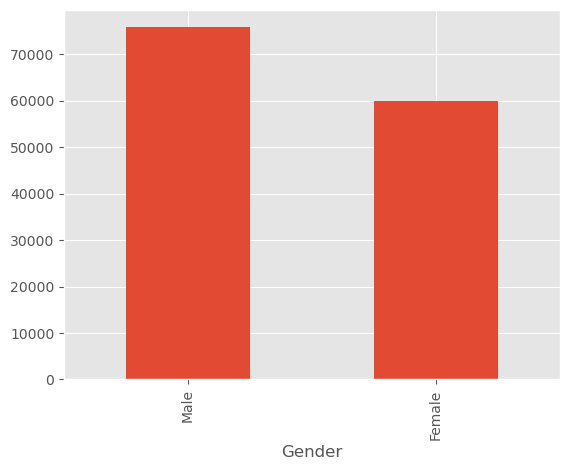

In [9]:
genders = df['Gender'].value_counts().head(7)
genders.plot.bar()

In [10]:
from sklearn.impute import SimpleImputer
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['Gender']] = imp2.fit_transform(df[['Gender']])

<AxesSubplot:xlabel='Gender'>

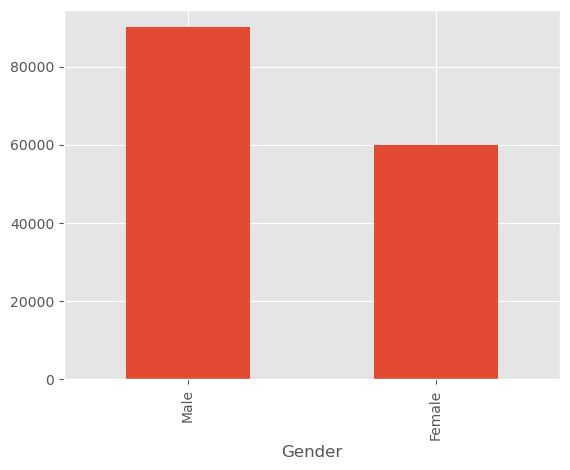

In [12]:
genders = df['Gender'].value_counts().head(7)
genders.plot.bar()

Осуществили заполнение категориального признака "Gender", используя стратегию 'most_frequent', 
которая заполняет пропуски наиболее часто встречающимися значениями. Также можно было использовать
стратегию "constant, тогда значение для заполнения можно использовать любое.
На графиках до и после можем проследить, что существенных изменений после заполнения не произошло,
значит метод нам подходит.

In [11]:
draw_missing(df).round(1)

,Total,Percent
Income,14295,9.5
Number,0,0.0
City,0,0.0
Gender,0,0.0
Age,0,0.0
Illness,0,0.0


In [13]:
total_count = df.shape[0]
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Income. Тип данных float64. Количество пустых значений 14295, 9.53%.


In [14]:
data_num = df[num_cols]
data_num

,Income
0,NaN
1,45084.0
2,52483.0
3,40941.0
4,50289.0
...,...
149995,93669.0
149996,96748.0
149997,111885.0
149998,111878.0


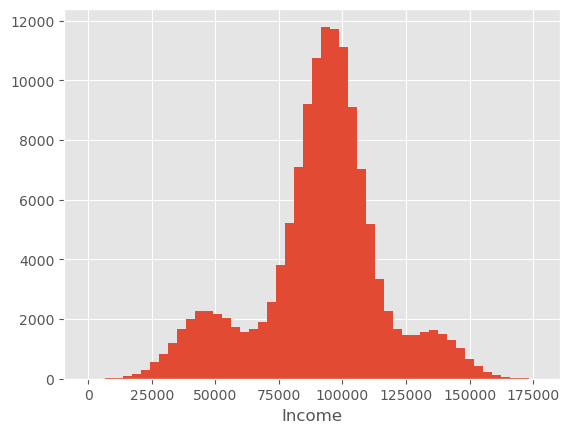

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

Проанализировав гистограмму придем к выводу, что лучше всего будет заполнить пропуски средним значением.

In [18]:
Inc = data_num[['Income']]
Inc.head()

,Income
0,NaN
1,45084.0
2,52483.0
3,40941.0
4,50289.0


In [19]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(Inc)
mask_missing_values_only

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [20]:
strategies=['mean', 'median', 'most_frequent']

In [21]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(Inc)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([91264.81831915, 91264.81831915, 91264.81831915, ...,
        91264.81831915, 91264.81831915, 91264.81831915]))

In [24]:
    temp_data = df[['Income']]
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    imp_num = SimpleImputer(strategy=strategies[0])
    data_num_imp = imp_num.fit_transform(temp_data)
    filled_data = data_num_imp[mask_missing_values_only]
    df[['Income']] = data_num_imp

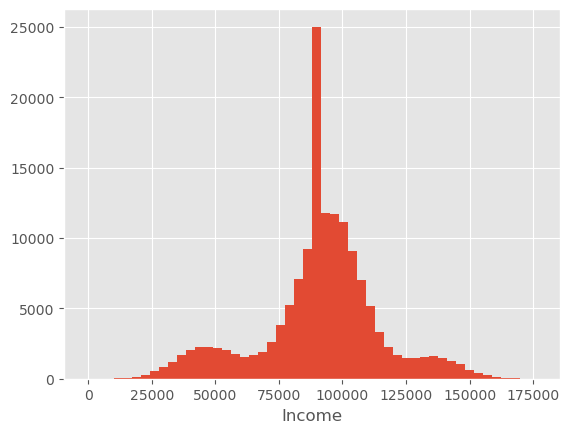

In [25]:
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

Также сущечтвуют такие способы заполнения, как медиана и наиболее часто встречающееся значене,
чтобы понять какой из трех использовать используют графики.

<AxesSubplot:xlabel='Income'>

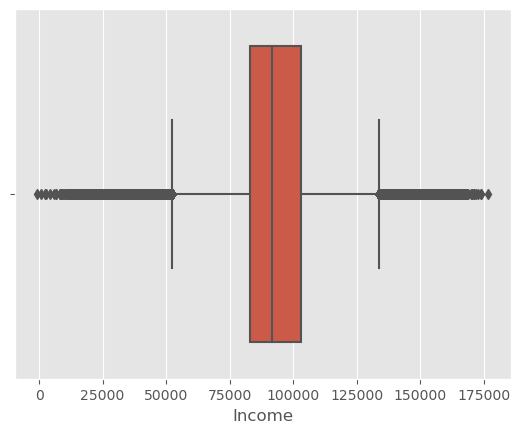

In [28]:
sns.boxplot(x=df["Income"])